In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_diamonds_raw_data = pd.read_csv('/home/ngarg/Downloads/diamonds.csv')

## Part 1: Text-based EDA

In [3]:
df_diamonds_raw_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_diamonds_raw_data.shape

(53940, 10)

In [5]:
col_typs = [type(col) for col in df_diamonds_raw_data.iloc[0, :]]
print(col_typs)

[<class 'numpy.float64'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>]


In [6]:
df_diamonds_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df_diamonds_raw_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df_diamonds_raw_data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [9]:
df_diamonds_raw_data.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### Understanding basic statistics

3 types of 'middle' values:

Mean: arithmetic mean, also known as 'average', only one value, only for numeric values.

Median: 'middle' value, can be two values if the number of observations is even (in thiscase the median value is the mean of the 2 median values), works well for numeric, but it can work for strings provided it has some numeric encoding (such as category codes), values need to be sorted.

Mode: most frequent value, can be more than 1, works equally well with strings and numeric types.

#### Create samples of a feature using the sample() method

Syntax:
    sample(n, random_state): 
        n is the number of observations you want in the sample
        random_state is the seed for random sampling, useful for reproducing results

In [10]:
depth_sample = df_diamonds_raw_data.depth.sample(n=10, random_state=70)
depth_sample

2479     57.4
3236     58.5
5933     61.6
40723    62.3
5624     61.7
26714    63.2
46794    60.5
9965     62.3
48747    58.4
28966    62.4
Name: depth, dtype: float64

In [11]:
depth_sample.mean()

60.83

In [12]:
depth_sample.sort_values()

2479     57.4
48747    58.4
3236     58.5
46794    60.5
5933     61.6
5624     61.7
40723    62.3
9965     62.3
28966    62.4
26714    63.2
Name: depth, dtype: float64

In [13]:
depth_sample.median()

61.650000000000006

In [14]:
depth_sample.mode()

0    62.3
dtype: float64

In [15]:
cut_unique = df_diamonds_raw_data.cut.unique()
cut_unique

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
cut_sample = df_diamonds_raw_data.cut.sample(n=10, random_state=70)
cut_sample

2479          Good
3236          Good
5933       Premium
40723    Very Good
5624       Premium
26714         Good
46794      Premium
9965     Very Good
48747      Premium
28966    Very Good
Name: cut, dtype: object

In [17]:
cut_sample.mode()

0    Premium
dtype: object

In [18]:
cut_sample_catcodes = cut_sample.astype('category').cat.codes
cut_sample_catcodes # 0 -> Good, 1 -> Premium, 2 -> Very Good

2479     0
3236     0
5933     1
40723    2
5624     1
26714    0
46794    1
9965     2
48747    1
28966    2
dtype: int8

In [19]:
cut_sample_catcodes.sort_values()

2479     0
3236     0
26714    0
5933     1
5624     1
46794    1
48747    1
40723    2
9965     2
28966    2
dtype: int8

In [20]:
cut_sample_catcodes.median() 

1.0

## Part 2: Viz based EDA

### Creating multiple samples of the 'depth' feature to illustrate the concept of the 'central limit theorum'

You can see that the data distribution progresses rapidly towards the 'normal' distribution as more observations are available in a sample.

#### The below distribution plots show that 'depth' data in our dataset is almost following the standard-normal distribution.

In [21]:
depth_sample1 = df_diamonds_raw_data.depth.sample(n=10, random_state=77)
depth_sample1.describe()

count    10.000000
mean     61.750000
std       0.891004
min      60.700000
25%      61.425000
50%      61.500000
75%      61.900000
max      63.800000
Name: depth, dtype: float64

In [22]:
depth_sample2 = df_diamonds_raw_data.depth.sample(n=100, random_state=77)
depth_sample2.describe()

count    100.000000
mean      61.676000
std        1.340671
min       56.900000
25%       60.775000
50%       61.900000
75%       62.600000
max       66.100000
Name: depth, dtype: float64

In [23]:
depth_sample3 = df_diamonds_raw_data.depth.sample(n=1000, random_state=77)
depth_sample3.describe()

count    1000.00000
mean       61.86060
std         1.42624
min        56.30000
25%        61.20000
50%        61.90000
75%        62.60000
max        69.70000
Name: depth, dtype: float64

In [24]:
df_diamonds_raw_data.depth.describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

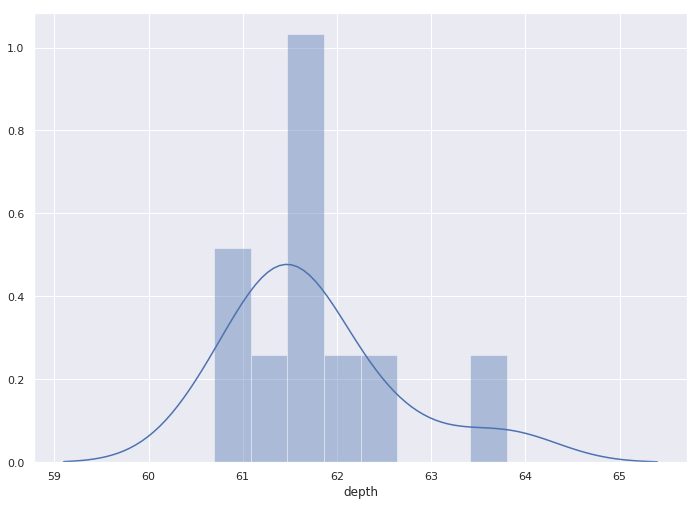

In [26]:
sns.distplot(depth_sample1)

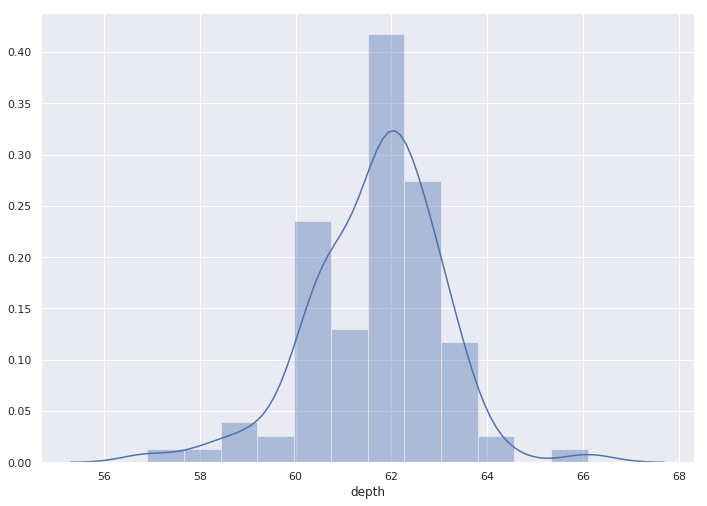

In [27]:
sns.distplot(depth_sample2)

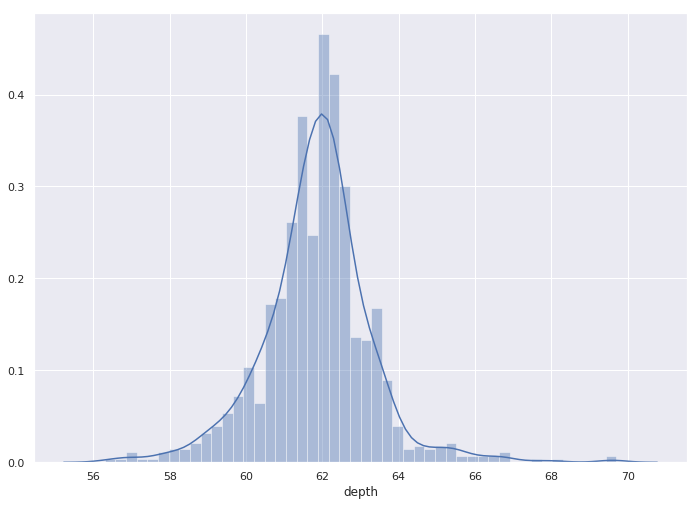

In [28]:
sns.distplot(depth_sample3)

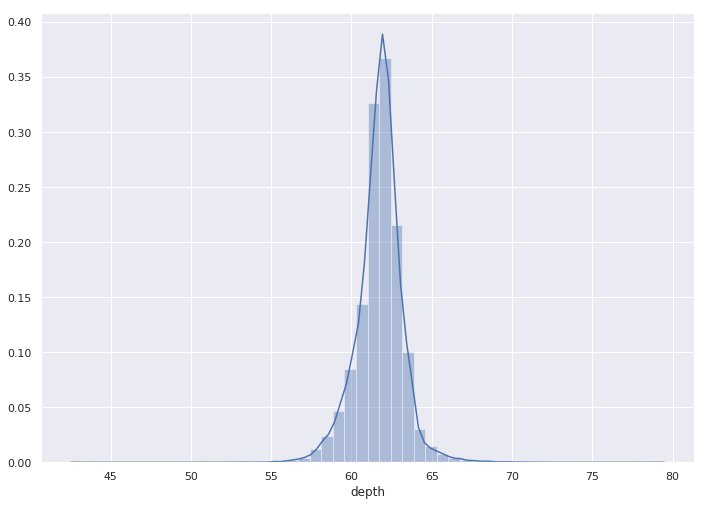

In [29]:
sns.distplot(df_diamonds_raw_data.depth)

#### The below distribution plots show that 'price' data in our dataset here does not follow the standard-normal distribution, as it is heavily skewed to the right. It is more like a log-normal distribution. 

In [30]:
price_sample1 = df_diamonds_raw_data.price.sample(n=10, random_state=77)
price_sample1.describe()

count      10.000000
mean     2427.800000
std      2862.179348
min       596.000000
25%       680.000000
50%       954.000000
75%      2615.500000
max      9282.000000
Name: price, dtype: float64

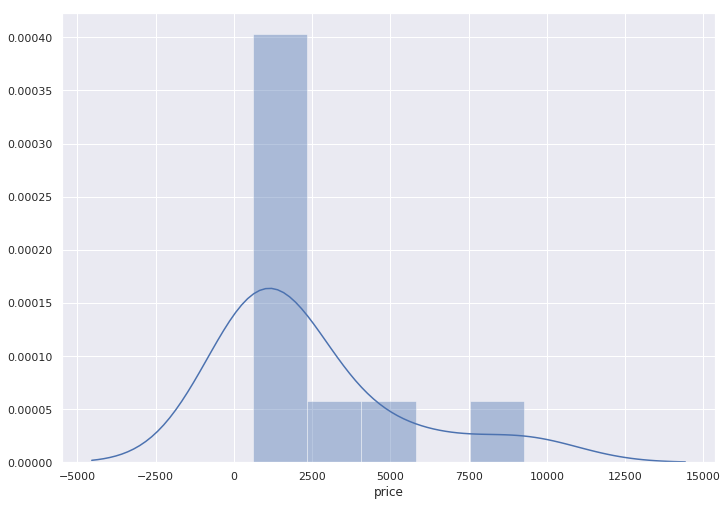

In [31]:
sns.distplot(price_sample1)

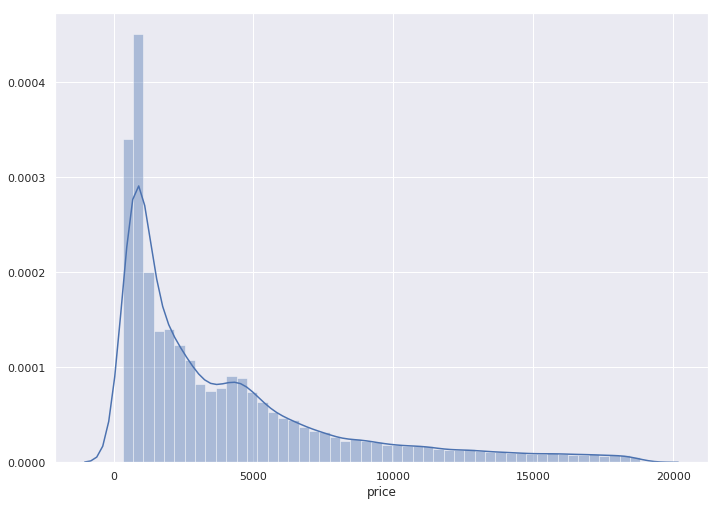

In [32]:
sns.distplot(df_diamonds_raw_data.price)

### Residual plot for vizualizing the regression errors (residuals) when y is regressed on x

Residual = Observed value - Predicted value

#### Understanding residuals

In [33]:
df_diamonds_raw_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### Say, by just looking at the 5 observations above, you come up with a formula to calculate the price based only on carat value.

price = carat * 1500

In [34]:
manual_regression_price = df_diamonds_raw_data.carat.head() * 1500

In [35]:
manual_regression_price

0    345.0
1    315.0
2    345.0
3    435.0
4    465.0
Name: carat, dtype: float64

##### Now, lets calucate the resuduals (or errors - that is the difference between your predictions and actual prices)

In [36]:
errors = df_diamonds_raw_data.price.head() - manual_regression_price

In [37]:
errors

0    -19.0
1     11.0
2    -18.0
3   -101.0
4   -130.0
dtype: float64

##### Create a copy of the raw data with a few features in x, and the target in y

In [38]:
df_diamonds_x = df_diamonds_raw_data[['carat', 'cut', 'color', 'clarity', 'depth']]
df_diamonds_y = df_diamonds_raw_data[['price']]
df_diamonds_x.cut = df_diamonds_x.cut.astype('category').cat.codes
df_diamonds_x.color = df_diamonds_x.color.astype('category').cat.codes
df_diamonds_x.clarity = df_diamonds_x.clarity.astype('category').cat.codes

/home/ngarg/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### The following residual plot shows a diagonal cone (funnel) pattern 

This pattern means that the regression model that residplot() created may not be the best model (i.e., carat alone cannot explain price using a linear model, although the pattern itself suggests linearity).

Technically, this pattern is 'biased and heteroscedastic'.

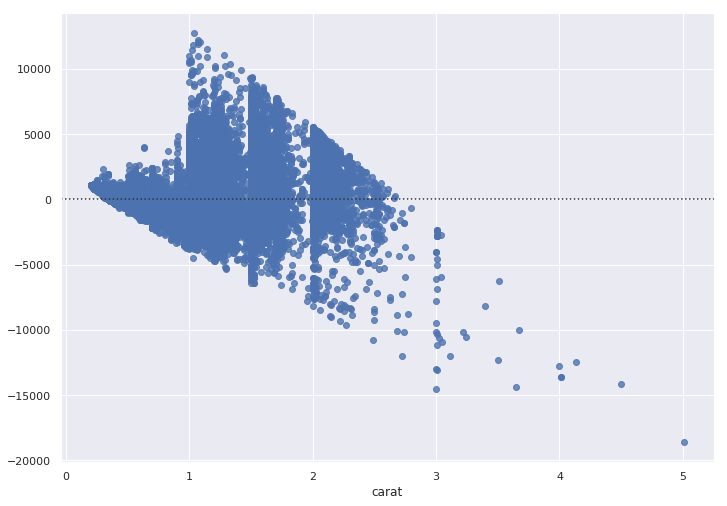

In [39]:
sns.residplot(df_diamonds_x.carat, df_diamonds_y)

#### The following residual plot shows an almost uniform pattern 

This pattern means that the the 'cut' feature has a linear association with price, but is not sufficient (need other features).

Technically, this pattern is 'biased and homoscedastic'.

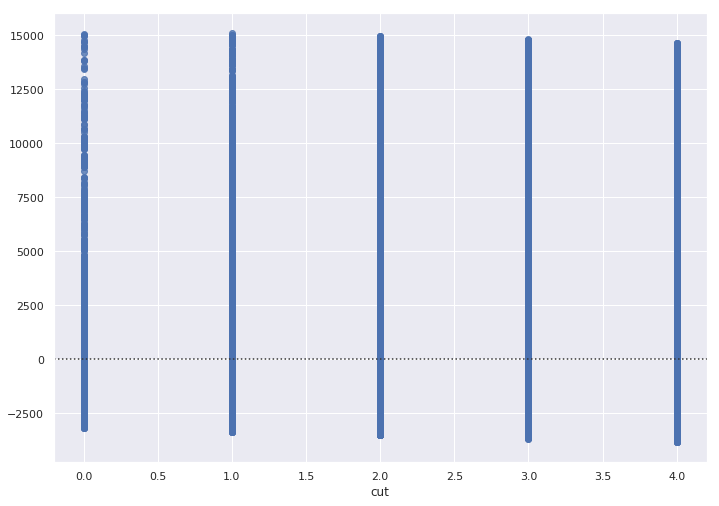

In [40]:
sns.residplot(df_diamonds_x.cut, df_diamonds_y)

#### The following residual plot also shows an almost uniform pattern 

This pattern means that the the 'color' feature has a linear association with price, but is not sufficient (need other features).

Technically, this pattern is also 'biased and homoscedastic'.

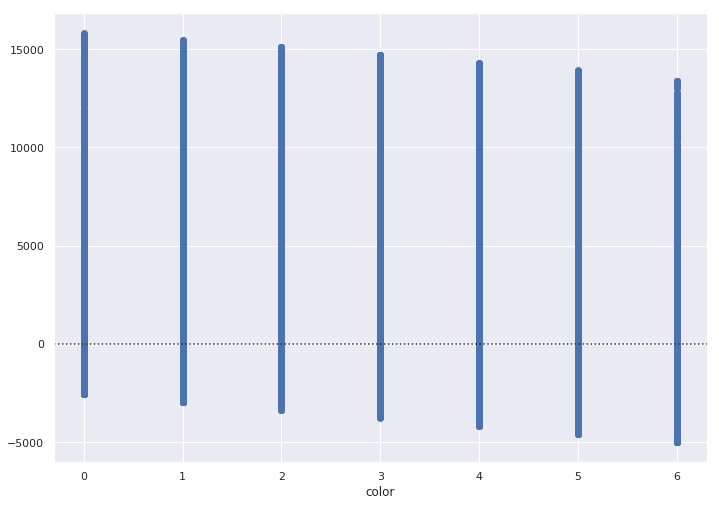

In [41]:
sns.residplot(df_diamonds_x.color, df_diamonds_y)

#### The following residual plot also shows an almost uniform pattern 

This pattern means that the the 'clarity' feature has a linear association with price, but is not sufficient (need other features).

Technically, this pattern is also 'biased and homoscedastic'.

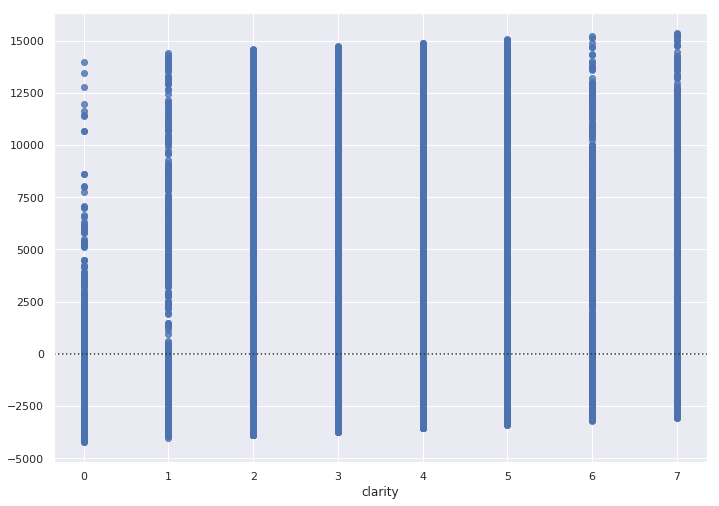

In [42]:
sns.residplot(df_diamonds_x.clarity, df_diamonds_y)

#### The following residual plot shows an concentrated strip pattern 

This pattern means that the the 'depth' feature has a linear association with price, but is not sufficient (need other features).

Technically, this pattern is also 'biased and homoscedastic'.

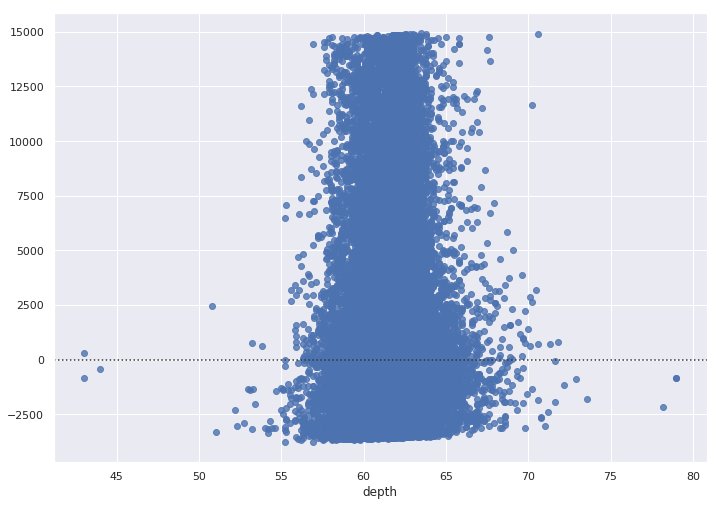

In [43]:
sns.residplot(df_diamonds_x.depth, df_diamonds_y)

### Pairplot to show relations between all variables using scatterplots, also shows frequency distributions of individual variables as histograms in the diagonal

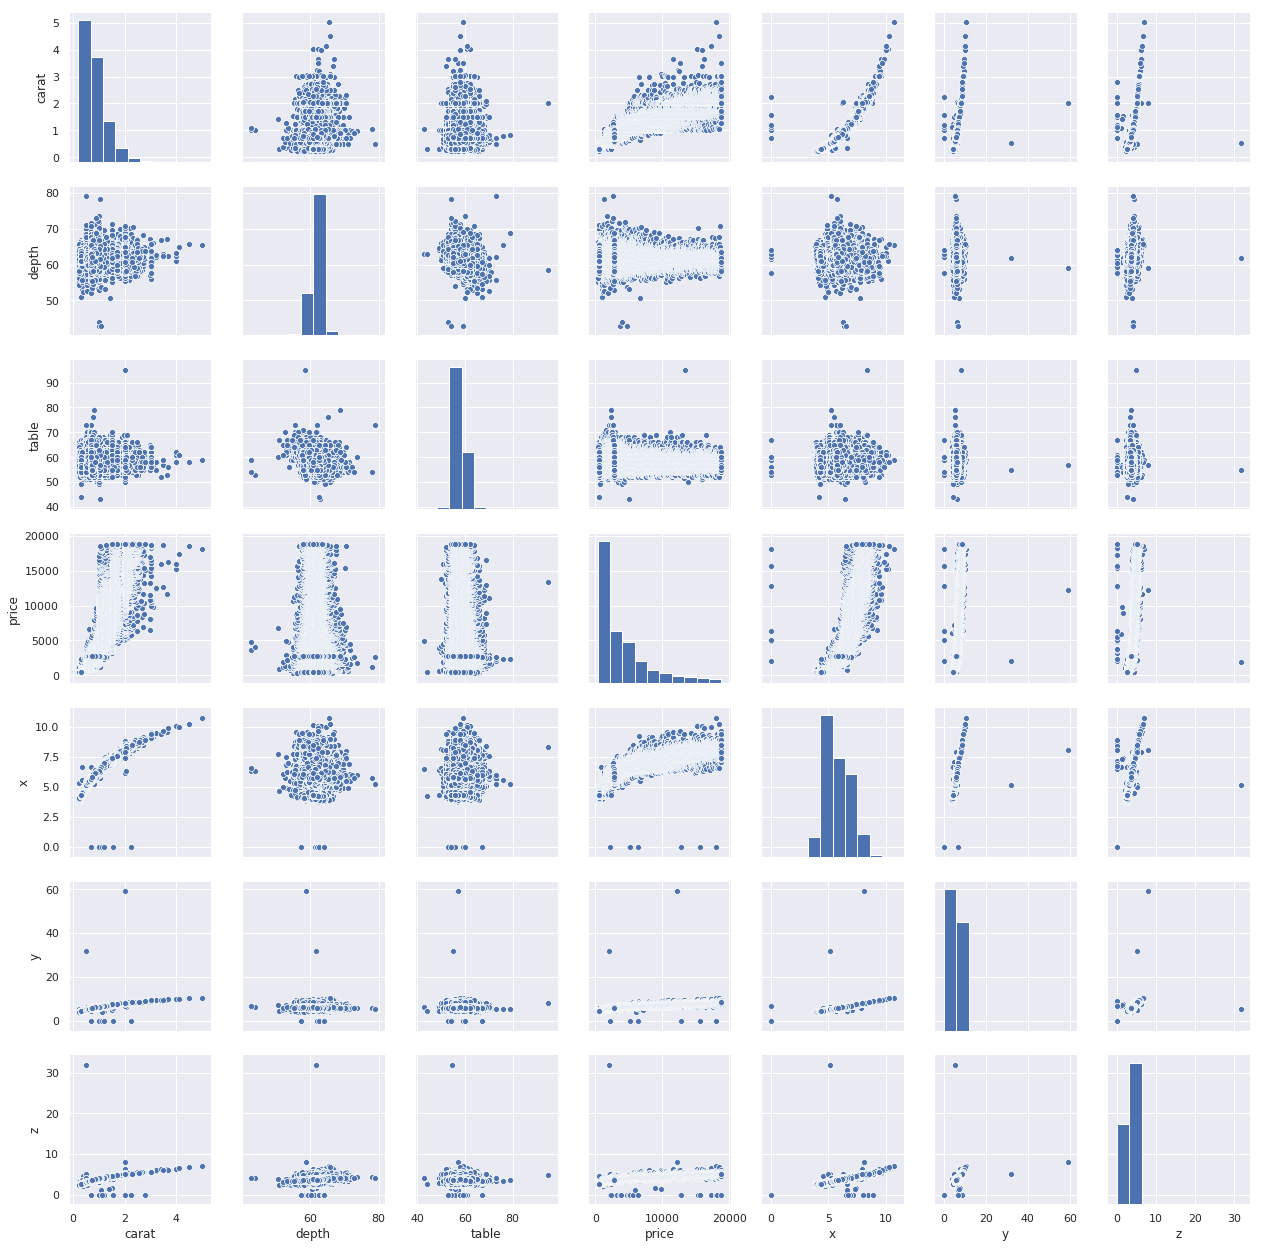

In [44]:
sns.pairplot(df_diamonds_raw_data)